<a href="https://colab.research.google.com/github/AaryanAnand10/Traffic-Prediction/blob/main/Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [2]:
# Load the data
traffic_data = pd.read_csv('/content/traffic.csv')

traffic_data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
# Convert 'DateTime' to datetime object
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

missing_values = traffic_data.isnull().sum()

duplicates = traffic_data.duplicated().sum()

# Summary statistics for the 'Vehicles' column
vehicles_stats = traffic_data['Vehicles'].describe()

missing_values, duplicates, vehicles_stats

(DateTime    0
 Junction    0
 Vehicles    0
 ID          0
 dtype: int64,
 0,
 count    48120.000000
 mean        22.791334
 std         20.750063
 min          1.000000
 25%          9.000000
 50%         15.000000
 75%         29.000000
 max        180.000000
 Name: Vehicles, dtype: float64)

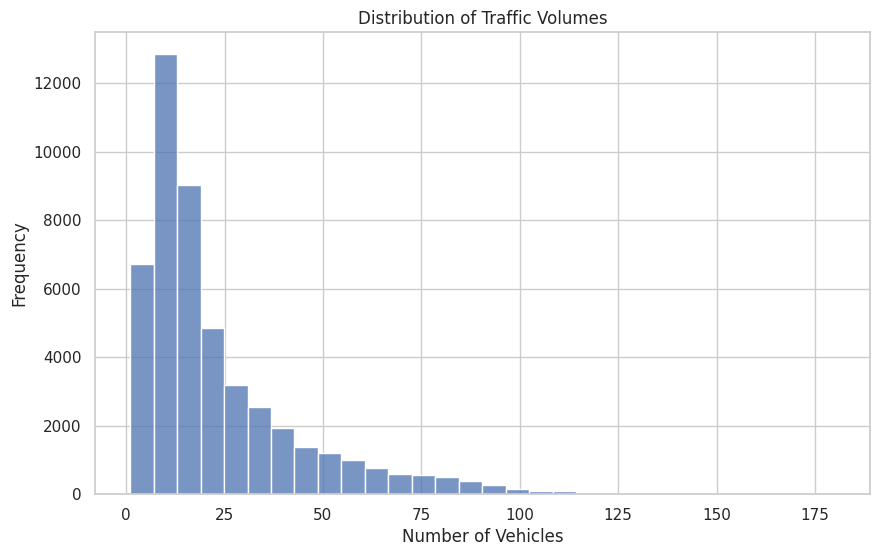

In [5]:
# Set the style of seaborn

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(traffic_data['Vehicles'], kde=False, bins=30)
plt.title('Distribution of Traffic Volumes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

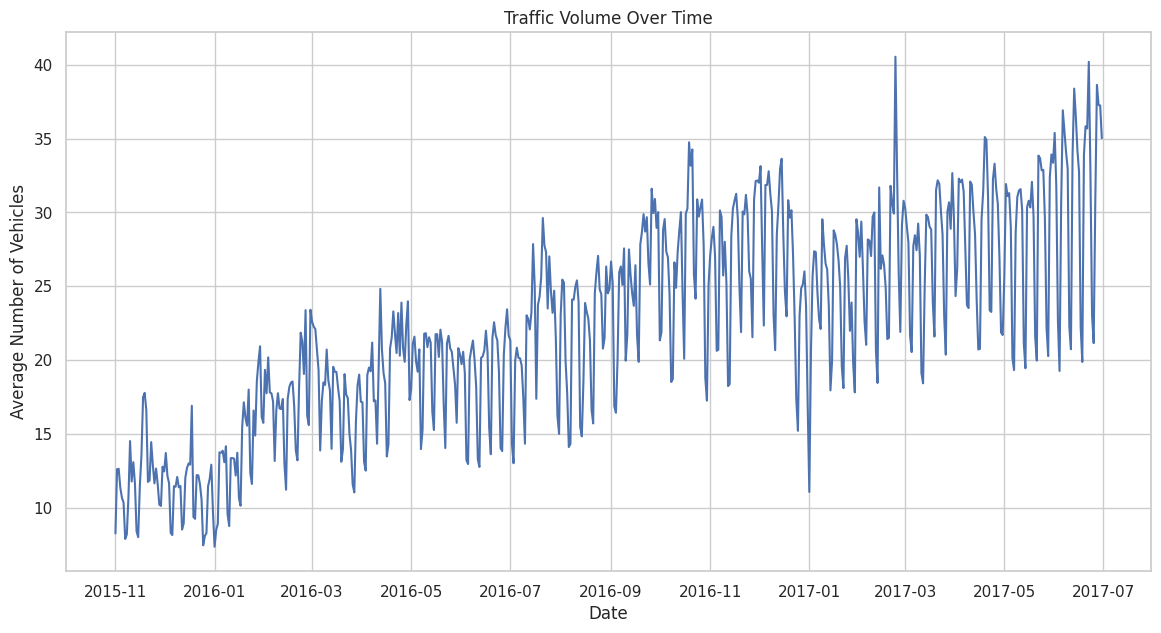

In [6]:
plt.figure(figsize=(14, 7))
traffic_data_resampled = traffic_data.set_index('DateTime').resample('D').mean()
sns.lineplot(data=traffic_data_resampled, x=traffic_data_resampled.index, y='Vehicles')
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Vehicles')
plt.show()

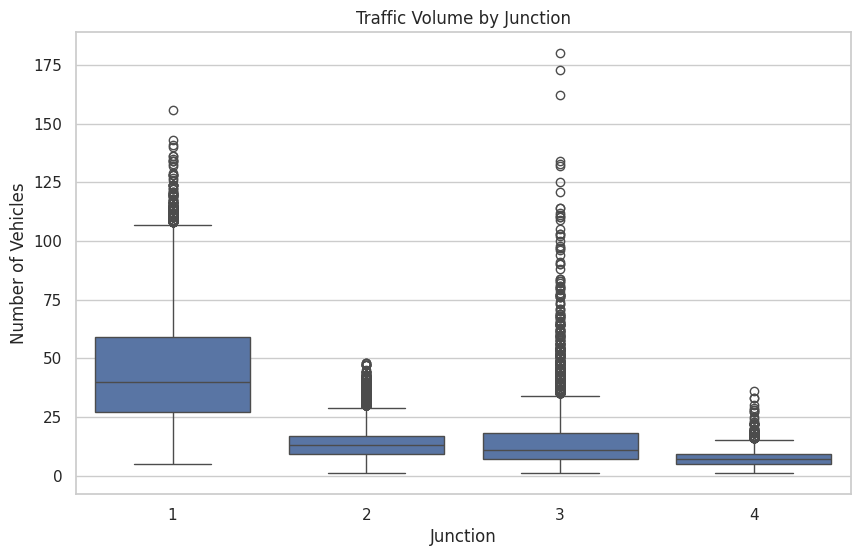

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Junction', y='Vehicles', data=traffic_data)
plt.title('Traffic Volume by Junction')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.show()

In [8]:

traffic_data['HourOfDay'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.day_name()

In [9]:

hourly_traffic = traffic_data.groupby('HourOfDay')['Vehicles'].mean().reset_index()

# Aggregate data to find mean traffic volume for each day of the week

weekly_traffic = traffic_data.groupby('DayOfWeek')['Vehicles'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

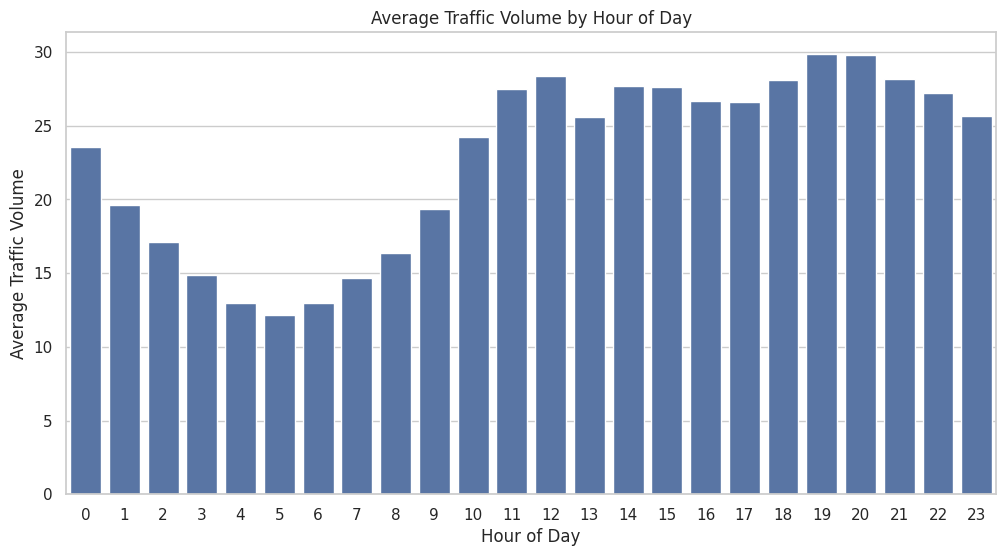

In [10]:
# Plotting the hourly traffic volume

plt.figure(figsize=(12, 6))
sns.barplot(x='HourOfDay', y='Vehicles', data=hourly_traffic)
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(np.arange(0, 24, 1))
plt.show()


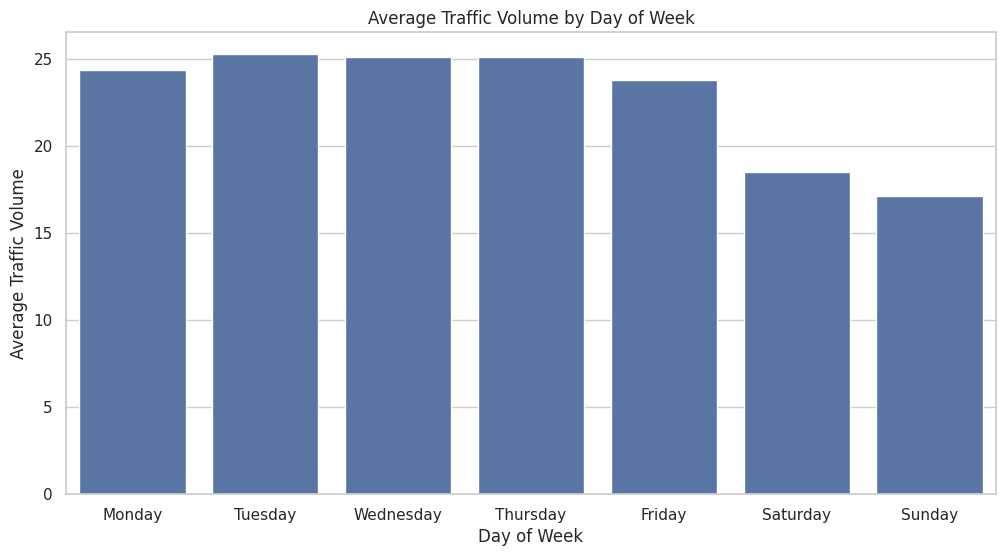

In [11]:

plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Vehicles', data=weekly_traffic)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.show()

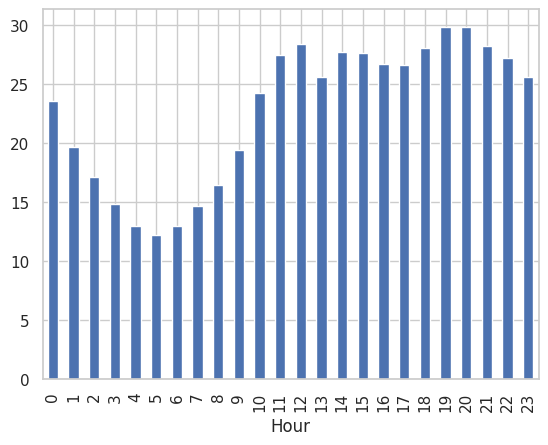

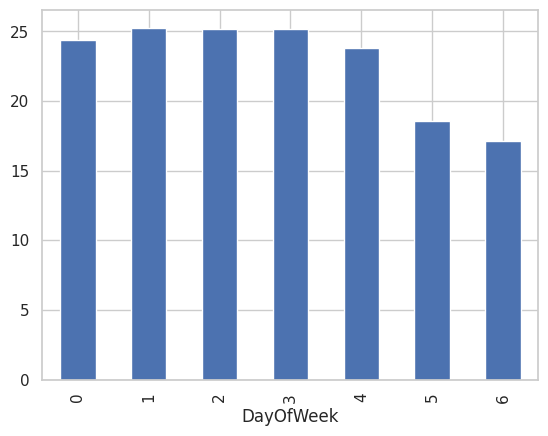

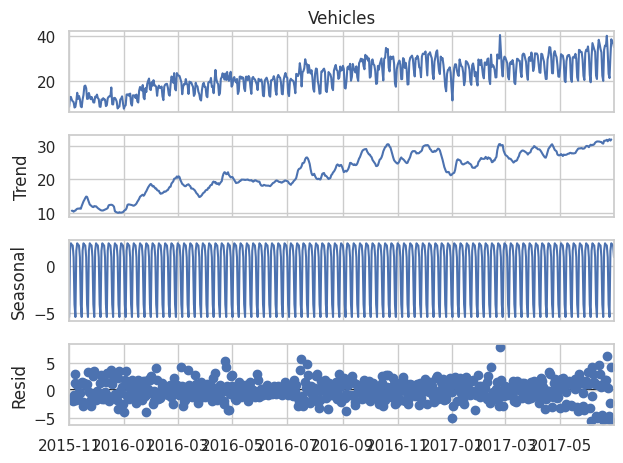

In [12]:
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['Hour'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek

# Peak Hour Analysis

avg_traffic_by_hour = traffic_data.groupby('Hour')['Vehicles'].mean()
avg_traffic_by_hour.plot(kind='bar')
plt.show()

# Day of the Week Analysis

avg_traffic_by_day = traffic_data.groupby('DayOfWeek')['Vehicles'].mean()
avg_traffic_by_day.plot(kind='bar')
plt.show()

# Time Series Decomposition

traffic_data_daily = traffic_data.set_index('DateTime').resample('D').mean()
decomposition = seasonal_decompose(traffic_data_daily['Vehicles'], model='additive')
decomposition.plot()
plt.show()

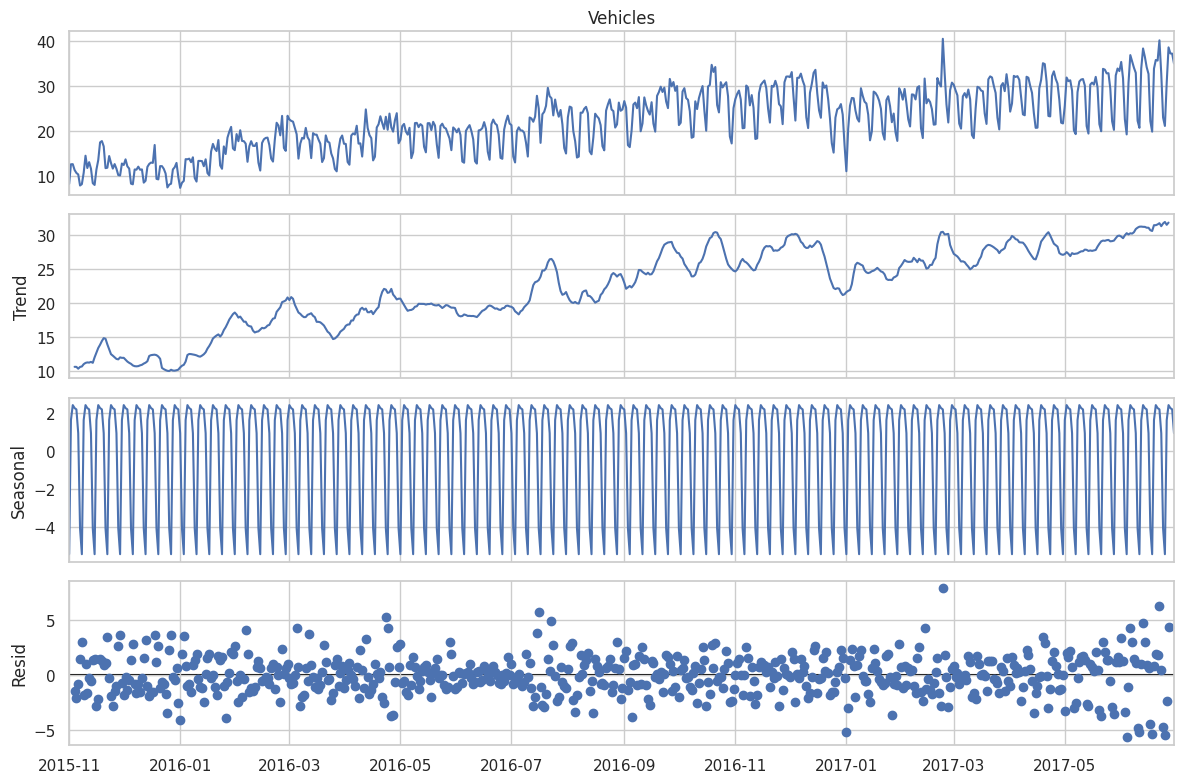

In [14]:
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data.set_index('DateTime', inplace=True)

# Resample the data to get daily averages
daily_traffic = traffic_data.resample('D').mean()

# Perform the seasonal decomposition
result = seasonal_decompose(daily_traffic['Vehicles'], model='additive', period=7)


plt.rcParams['figure.figsize'] = [12, 8]

result.plot()
plt.tight_layout()
plt.show()

**Correlation Analysis**

In [16]:
traffic_data = pd.read_csv('/content/traffic.csv')

# Convert 'DateTime' to datetime and create new time-related features
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['HourOfDay'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate the correlation matrix
correlation_matrix = traffic_data[['HourOfDay', 'DayOfWeek', 'Vehicles']].corr()

print(correlation_matrix)

              HourOfDay     DayOfWeek  Vehicles
HourOfDay  1.000000e+00  6.442124e-18  0.219938
DayOfWeek  6.442124e-18  1.000000e+00 -0.126027
Vehicles   2.199377e-01 -1.260265e-01  1.000000


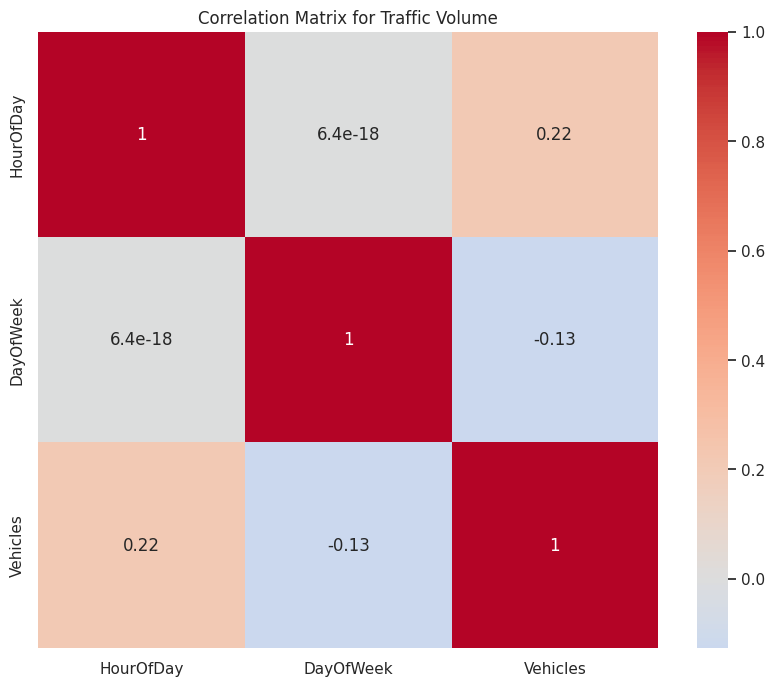

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Traffic Volume')
plt.show()

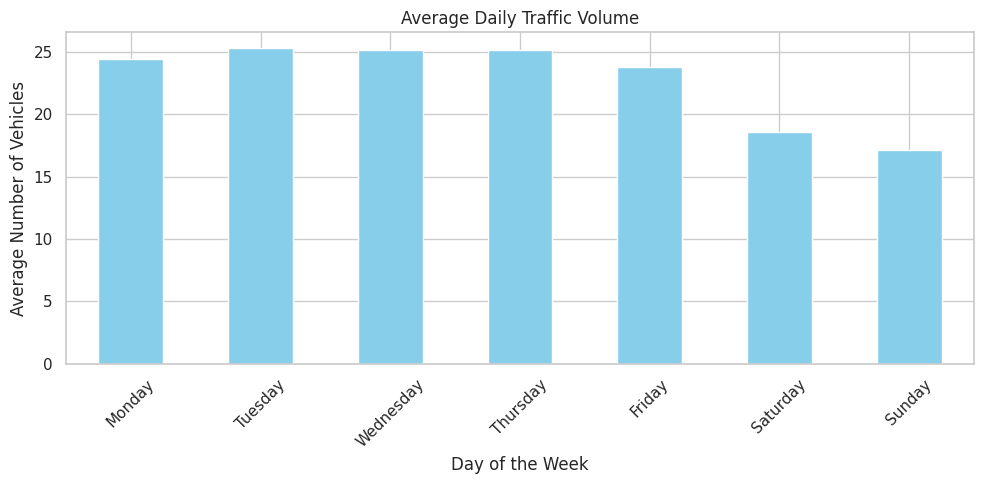

In [18]:
traffic_data = pd.read_csv('/content/traffic.csv')

traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Extract the day of the week from 'DateTime' (Monday=0, Sunday=6)
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek

# Group by 'DayOfWeek' and calculate the mean number of vehicles
average_traffic_by_day = traffic_data.groupby('DayOfWeek')['Vehicles'].mean()

# Create a mapping from day numbers to names for better readability
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_traffic_by_day.index = average_traffic_by_day.index.map(day_names)


plt.figure(figsize=(10, 5))
average_traffic_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Daily Traffic Volume')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
